In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/startup_failure_prediction.csv")
df.head()

,Startup_Name,Industry,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Market_Size,Business_Model,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status
0,Startup_1,Logistics,8,18328419,2,13,581,97866143,602731,Medium,B2B,2,79.61,987830,1
1,Startup_2,Education,3,39753708,3,16,529,36868744,820698,Large,B2C,3,32.47,599615,1
2,Startup_3,Healthcare,14,18073294,1,28,82,3478737,992205,Small,B2C,1,9.88,780730,1
3,Startup_4,E-commerce,5,19435653,4,14,234,80716899,536747,Medium,B2C,9,23.20,188588,1
4,Startup_5,Finance,14,4205797,4,17,960,53347246,555199,Medium,Hybrid,3,73.52,310892,1


In [3]:
print('Data Overview')
print('=' * 50)
print(f'Data Shape: {df.shape}')
print('=' * 50)
print('Availabel Columns:')
print(df.columns.tolist())
print(f"\n Data Types:")
print(df.dtypes)

Data Overview
Data Shape: (5000, 15)
Availabel Columns:
['Startup_Name', 'Industry', 'Startup_Age', 'Funding_Amount', 'Number_of_Founders', 'Founder_Experience', 'Employees_Count', 'Revenue', 'Burn_Rate', 'Market_Size', 'Business_Model', 'Product_Uniqueness_Score', 'Customer_Retention_Rate', 'Marketing_Expense', 'Startup_Status']

 Data Types:
Startup_Name                 object
Industry                     object
Startup_Age                   int64
Funding_Amount                int64
Number_of_Founders            int64
Founder_Experience            int64
Employees_Count               int64
Revenue                       int64
Burn_Rate                     int64
Market_Size                  object
Business_Model               object
Product_Uniqueness_Score      int64
Customer_Retention_Rate     float64
Marketing_Expense             int64
Startup_Status                int64
dtype: object


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Startup_Name              5000 non-null   object 
 1   Industry                  5000 non-null   object 
 2   Startup_Age               5000 non-null   int64  
 3   Funding_Amount            5000 non-null   int64  
 4   Number_of_Founders        5000 non-null   int64  
 5   Founder_Experience        5000 non-null   int64  
 6   Employees_Count           5000 non-null   int64  
 7   Revenue                   5000 non-null   int64  
 8   Burn_Rate                 5000 non-null   int64  
 9   Market_Size               5000 non-null   object 
 10  Business_Model            5000 non-null   object 
 11  Product_Uniqueness_Score  5000 non-null   int64  
 12  Customer_Retention_Rate   5000 non-null   float64
 13  Marketing_Expense         5000 non-null   int64  
 14  Startup_

In [5]:
df.isnull().sum()

Startup_Name                0
Industry                    0
Startup_Age                 0
Funding_Amount              0
Number_of_Founders          0
Founder_Experience          0
Employees_Count             0
Revenue                     0
Burn_Rate                   0
Market_Size                 0
Business_Model              0
Product_Uniqueness_Score    0
Customer_Retention_Rate     0
Marketing_Expense           0
Startup_Status              0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Startup_Age,Funding_Amount,Number_of_Founders,Founder_Experience,Employees_Count,Revenue,Burn_Rate,Product_Uniqueness_Score,Customer_Retention_Rate,Marketing_Expense,Startup_Status
count,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,6.992000,2.497341e+07,2.502400,14.740400,496.726800,4.992015e+07,500959.922600,4.959600,50.218224,507304.287800,1.0
std,4.345816,1.445770e+07,1.117785,8.669212,292.723769,2.878964e+07,287379.948383,2.584357,28.560079,289234.193397,0.0
min,0.000000,1.120900e+04,1.000000,0.000000,1.000000,3.213000e+03,5016.000000,1.000000,0.040000,5253.000000,1.0
25%,3.000000,1.250012e+07,2.000000,7.000000,236.000000,2.458307e+07,249027.500000,3.000000,25.645000,259590.500000,1.0
50%,7.000000,2.496105e+07,2.000000,15.000000,498.500000,5.026676e+07,503405.500000,5.000000,50.070000,503504.500000,1.0
75%,11.000000,3.747532e+07,4.000000,22.000000,747.000000,7.478164e+07,751950.000000,7.000000,74.702500,760906.000000,1.0
max,14.000000,4.999313e+07,4.000000,29.000000,999.000000,9.999663e+07,999554.000000,9.000000,99.980000,999866.000000,1.0


In [8]:
print("\nValue Counts:")
print(df["Startup_Status"].value_counts())

print("\nUnique Values:")
print(df["Startup_Status"].unique())


Value Counts:
Startup_Status
1    5000
Name: count, dtype: int64

Unique Values:
[1]


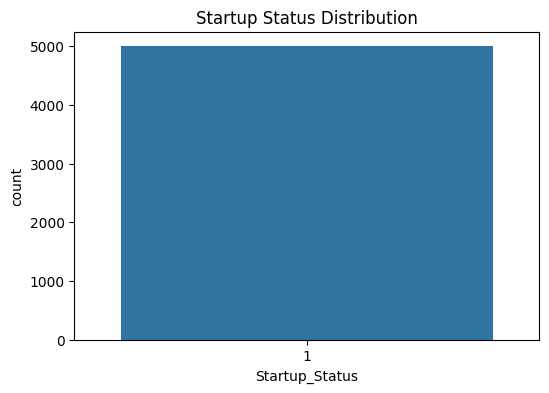

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x="Startup_Status", data=df)
plt.title("Startup Status Distribution")
plt.show()

In [10]:
df.rename(columns={"Startup_Status": "failure"}, inplace=True)
df["failure"].value_counts()

failure
1    5000
Name: count, dtype: int64